<a href="https://colab.research.google.com/github/hienvu79/CuoiKy/blob/main/VuThiThaoHien_16013671.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Lập trình phân tích dữ liệu 2 
- Vũ Thị Thảo Hiền - 16013671

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.ExcelFile('/content/KQThiLyThuyet-26.12.2020_ca2.xls')

In [3]:
result=df.parse('Sheet1') 

In [4]:
result.isnull().sum()

Unnamed: 0    18
Unnamed: 1    16
Unnamed: 2    19
Unnamed: 3    17
Unnamed: 4    17
Unnamed: 5    23
Unnamed: 6    17
Unnamed: 7    19
dtype: int64

In [5]:
result.head(15)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KẾT QUẢ THI LÝ THUYẾT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Đợt thi: 26/12/2020,NaN,NaN,NaN,NaN,Ngày thi: 26/12/2020,NaN
6,NaN,Môn thi: Kỹ năng ứng dụng CNTT cơ bản,NaN,NaN,NaN,NaN,Ca thi: 1,NaN
7,NaN,Mã đề thi: %MaDeThi,NaN,NaN,Số câu: %SoCau,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,STT,Mã SV,Họ đệm,Tên,Giới tính,Ngày sinh,Điểm,Điểm


In [6]:
result = result.drop([0,1,2,3,4,5,6,7,8,9])

In [7]:
result.head(15)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
10,1,18066431,Đỗ Huy Quốc,An,Nữ,2000-08-11 00:00:00,5,5
11,2,18031341,Hồ Văn Công,Anh,Nữ,27/09/2000,5.5,5.5
12,4,19462511,Nguyễn Thị Tuyết,Anh,Nữ,2001-01-01 00:00:00,6.3,6.5
13,5,18002951,Bùi Thái,Bình,Nữ,25/09/2000,5.8,6
14,6,18024551,Bùi Kim,Chi,Nữ,2000-04-06 00:00:00,7,7
15,7,18043821,Lương Thị Quế,Chi,Nữ,29/07/2000,6.5,6.5
16,8,17037311,Phạm Dương,Đức,Nữ,1999-04-03 00:00:00,6,6
17,9,18042341,Đỗ Thị,Giang,Nữ,21/02/2000,4.5,4.5
18,10,18038211,Trần Thị Thùy,Giang,Nữ,NaN,4,4
19,11,17033471,La Hồng,Giao,Nữ,1999-10-10 00:00:00,5,5


In [8]:
  result=result.rename(columns={'Unnamed: 0':'STT'})
  result=result.rename(columns={'Unnamed: 1':'Mã SV'})
  result=result.rename(columns={'Unnamed: 2':'Họ Đệm'})
  result=result.rename(columns={'Unnamed: 3':'Tên'})
  result=result.rename(columns={'Unnamed: 4':'Giới tính'})
  result=result.rename(columns={'Unnamed: 5':'Ngày sinh'})
  result=result.rename(columns={'Unnamed: 6':'Điểm'})
  result=result.rename(columns={'Unnamed: 7':'ĐiểmTB'})

In [9]:
result

,STT,Mã SV,Họ Đệm,Tên,Giới tính,Ngày sinh,Điểm,ĐiểmTB
10,1,18066431,Đỗ Huy Quốc,An,Nữ,2000-08-11 00:00:00,5,5
11,2,18031341,Hồ Văn Công,Anh,Nữ,27/09/2000,5.5,5.5
12,4,19462511,Nguyễn Thị Tuyết,Anh,Nữ,2001-01-01 00:00:00,6.3,6.5
13,5,18002951,Bùi Thái,Bình,Nữ,25/09/2000,5.8,6
14,6,18024551,Bùi Kim,Chi,Nữ,2000-04-06 00:00:00,7,7
...,...,...,...,...,...,...,...,...
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
result.isnull().sum()

STT          10
Mã SV        10
Họ Đệm       10
Tên           8
Giới tính     9
Ngày sinh    14
Điểm         10
ĐiểmTB       10
dtype: int64

In [11]:
result['Điểm'].median(skipna=True)


5.4

In [12]:
result['ĐiểmTB'].median(skipna=True)


5.5

In [13]:
result['Giới tính'].value_counts().idxmax()


'Nữ'

In [14]:
result['Ngày sinh'].value_counts().idxmax()

'13/03/1999'

In [15]:
result['Điểm'].fillna(result['Điểm'].median(skipna=True),inplace=True)
result['ĐiểmTB'].fillna(result['ĐiểmTB'].median(skipna=True),inplace=True)
result['Giới tính'].fillna(result['Giới tính'].value_counts().idxmax(),inplace=True)
result['Ngày sinh'].fillna(result['Ngày sinh'].value_counts().idxmax(),inplace=True)

In [16]:
result.isnull().sum()


STT          10
Mã SV        10
Họ Đệm       10
Tên           8
Giới tính     0
Ngày sinh     0
Điểm          0
ĐiểmTB        0
dtype: int64

In [17]:
result.describe()

,Điểm,ĐiểmTB
count,74.000000,74.000000
mean,5.327027,5.432432
std,1.120457,1.138746
min,0.000000,0.000000
25%,4.800000,5.000000
50%,5.400000,5.500000
75%,6.225000,6.375000
max,7.000000,7.000000


In [18]:
Điểm = ['Điểm','ĐiểmTB']
result=result[Điểm]

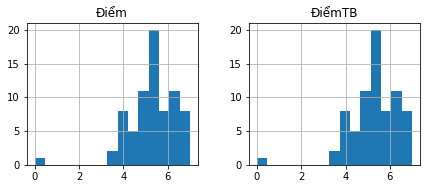

In [19]:
result[Điểm].hist(bins=15, figsize=(15, 6), layout=(2, 4));



- Ta nhận thấy các cột điểm số sinh viên thường tập trung vào khoảng từ 3 đến 7 điểm.
- Một số ít sinh viên bị điểm 0.
- Từ khoảng 1 đến 3 điểm thì không có sinh viên nào.


In [ ]:
sns.boxplot(x=result['Giới tính'], y=result['Điểm'])